<a href="https://colab.research.google.com/github/h4cktivist/credit-scoring-ML/blob/main/Credit_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/credit_scoring.csv')

### 📁 Описание данных

Датасет содержит информацию о клиентах некоторого банка.
По различным характеристикам клиентов спрогнозировать целевую переменную - имел клиент просрочку 90 и более дней или нет (и если имел, то банк не будет выдавать кредит этому клиенту, а иначе будет).

_Целевая переменная (таргет)_ – `SeriousDlqin2yrs`: клиент будет иметь просрочку по кредиту на 90 и более дней

_Признаки_
- `RevolvingUtilizationOfUnsecuredLines`: общий остаток по кредиту, деленный на сумму кредитных лимитов
- `age`: возраст заемщика в годах
- `NumberOfTime30-59DaysPastDueNotWorse`: количество случаев, когда заемщик просрочил платеж на 30-59 дней за последние 2 года
- `DebtRatio`: ежемесячные расходы деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов и кредитных карт
- `NumberOfTimes90DaysLate`: количество случаев, когда заемщик просрочил платеж на 90 дней или более за последние 2 года
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) ‒ чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: количество случаев, когда заемщик просрочил платеж на 60-89 дней за последние 2 года
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др.)
- `GroupAge`: закодированная возрастная группа ‒ чем больше код, тем больше возраст

In [ ]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,0,0.221813,43.0,0,0.527888,3280.0,7,0,0,2.0,A,c
1,0,0.602794,25.0,0,0.065868,333.0,2,0,0,0.0,A,b
2,1,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,A,c
3,0,0.075427,32.0,0,0.085512,7916.0,6,0,0,0.0,A,b
4,0,0.046560,58.0,0,0.241622,2416.0,9,0,0,0.0,A,d


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,135155.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.293618,0.421033,353.005076,6.670221e+03,8.452760,0.265973,0.240387,0.757222
std,0.249746,249.755371,14.772577,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000


In [ ]:
df.describe(include='object')

,RealEstateLoansOrLines,GroupAge
count,150000,150000
unique,5,5
top,A,d
freq,140048,47268


### 🚧 Обработка данных

Заменяем категориальные признаки, описывающие закодированное число кредитов (`RealEstateLoansOrLines`) и возрастную группу (`GroupAge`), на соотвествующие им числовые значения.

Так как чем больше кредитов имеет человек, тем больше код буквы, логично будет изменить их целыми числами от 1 до 5.

По той же логике заменяем на числа буквы возрастной группы.

In [ ]:
mapping = {'A': '1', 'B': '2', 'C': '3', 'D': '4', 'E': '5'}

for column in ['RealEstateLoansOrLines', 'GroupAge']:
  for letter, number in mapping.items():
    df[column] = df[column].str.upper().replace(letter, number)

  df[column] = df[column].astype(int)

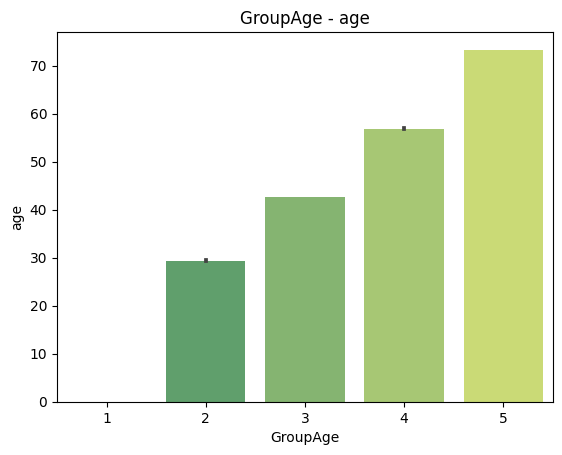

In [ ]:
sns.barplot(x='GroupAge', y='age', data = df, palette='summer')
plt.title('GroupAge - age')
plt.show()

Заменяем пустые ячейки признака `age` случайными целыми числами из диапозона, соотвествующего возрастной группе, к которой относится человек.



In [ ]:
ranges = dict()
for i in range(1, 6):
  ranges[i] = (df[df.GroupAge == i]['age'].min(), df[df.GroupAge == i]['age'].max())
  print(f"GroupAge {i}: {df[df.GroupAge == i]['age'].min(), df[df.GroupAge == i]['age'].max()}")

GroupAge 1: (0.0, 0.0)
GroupAge 2: (21.0, 34.0)
GroupAge 3: (35.0, 49.0)
GroupAge 4: (50.0, 64.0)
GroupAge 5: (65.0, 109.0)


In [ ]:
from random import randint

df['age'] = df.apply(
    lambda x: round(randint(ranges[x.GroupAge][0], ranges[x.GroupAge][1])) if np.isnan(x['age']) else x['age'],
    axis=1
)

In [ ]:
df.age.value_counts(dropna=False)

49.0     3471
48.0     3456
63.0     3374
50.0     3365
46.0     3339
         ... 
103.0     321
105.0     303
99.0      302
21.0      169
0.0         1
Name: age, Length: 90, dtype: int64

Заполняем пустые значения признака количества иждивенцев (`NumberOfDependents`) средним значением, округленным до целого.

In [ ]:
df['NumberOfDependents'].fillna(round(df['NumberOfDependents'].mean()), inplace=True)

Проверяем, есть ли значимые корреляции признака ежемесячного дохода (`MonthlyIncome`) с каким-либо из других, чтобы оценить возможность предсказания данного признака.

In [ ]:
df[['MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'RealEstateLoansOrLines', 'NumberOfDependents', 'GroupAge']].corr()

,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RealEstateLoansOrLines,NumberOfDependents,GroupAge
MonthlyIncome,1.000000,0.091455,0.089999,0.062647,0.035023
NumberOfOpenCreditLinesAndLoans,0.091455,1.000000,0.262973,0.061274,0.140525
RealEstateLoansOrLines,0.089999,0.262973,1.000000,0.046646,0.024184
NumberOfDependents,0.062647,0.061274,0.046646,1.000000,-0.165870
GroupAge,0.035023,0.140525,0.024184,-0.165870,1.000000


Так как `MonthlyIncome` особо ни с чем не коррелирует, заполняем пустоты медианой.

In [ ]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  int64  
 11  

In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,55.714227,0.421033,353.005076,6.418455e+03,8.452760,0.265973,0.240387,0.763573,1.076920,3.771887
std,0.249746,249.755371,17.882514,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,4.155179,1.101086,0.306057,0.989830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.029867,43.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,0.154181,54.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,0.000000,0.559046,67.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,0.000000,1.000000,1.000000,5.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,98.000000,20.000000,5.000000,5.000000


### 📈 Анализ данных

Наблюдаем прямую зависимость, между закодированным числом кредитов (`RealEstateLoansOrLines`) и самим количеством кредитов (`NumberOfOpenCreditLinesAndLoans`).

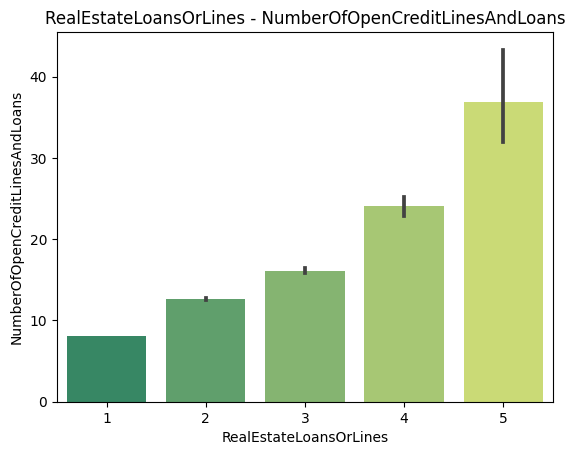

In [ ]:
sns.barplot(x='RealEstateLoansOrLines', y='NumberOfOpenCreditLinesAndLoans', data = df, palette='summer')
plt.title('RealEstateLoansOrLines - NumberOfOpenCreditLinesAndLoans')
plt.show()

Вычисляем медианы количества кредитов по каждой из кредитных групп.

In [ ]:
for i in range(1, 6):
  print(f"RealEstateLoansOrLines {i} Median: {df[df.RealEstateLoansOrLines == i]['NumberOfOpenCreditLinesAndLoans'].median()}")

RealEstateLoansOrLines 1 Median: 7.0
RealEstateLoansOrLines 2 Median: 12.0
RealEstateLoansOrLines 3 Median: 15.0
RealEstateLoansOrLines 4 Median: 24.0
RealEstateLoansOrLines 5 Median: 35.5


Распределение признаков, отвечающих за просрочки по платежам (`NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTime30-59DaysPastDueNotWorse`) показывает множественное количество выбросов, однако, можно заметить, что сами признаки между собой распределены похожим образом.

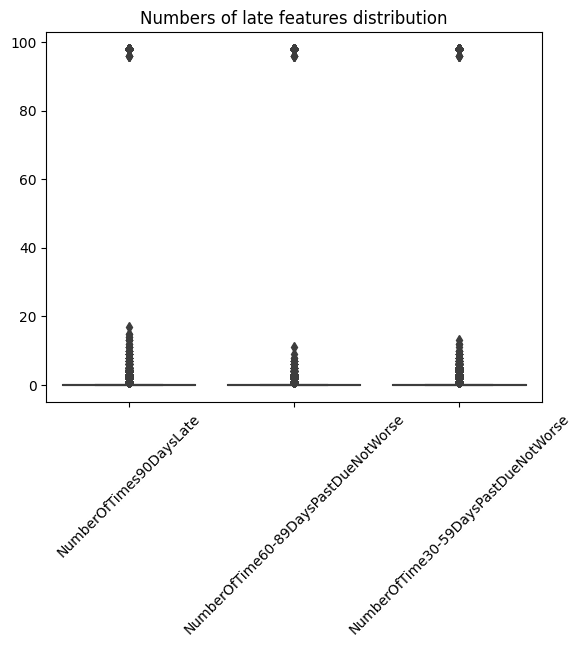

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000
mean,0.265973,0.240387,0.421033
std,4.169304,4.155179,4.192781
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [ ]:
ax = sns.boxplot(df[['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse']])
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title('Numbers of late features distribution')
plt.show()

df[['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse']].describe()

Распределение ежемесячного дохода (`MonthlyIncome`) также имеет множество выбросов и не является равномерным.

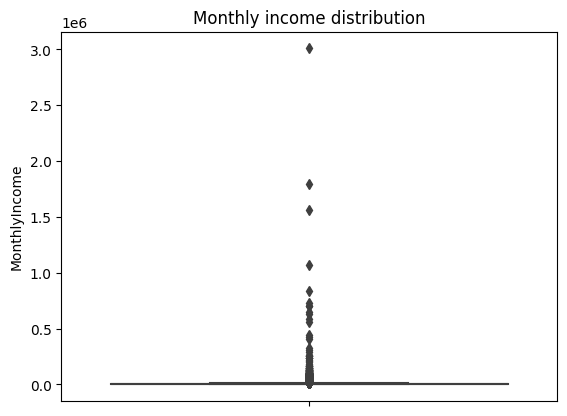

count    1.500000e+05
mean     6.418455e+03
std      1.289040e+04
min      0.000000e+00
25%      3.903000e+03
50%      5.400000e+03
75%      7.400000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [ ]:
sns.boxplot(y='MonthlyIncome', data=df)
plt.title('Monthly income distribution')
plt.show()

df['MonthlyIncome'].describe()

Количество открытых кредитов (`NumberOfOpenCreditLinesAndLoans`) в целом распределено нормально, однако выбросы всё же имеются.

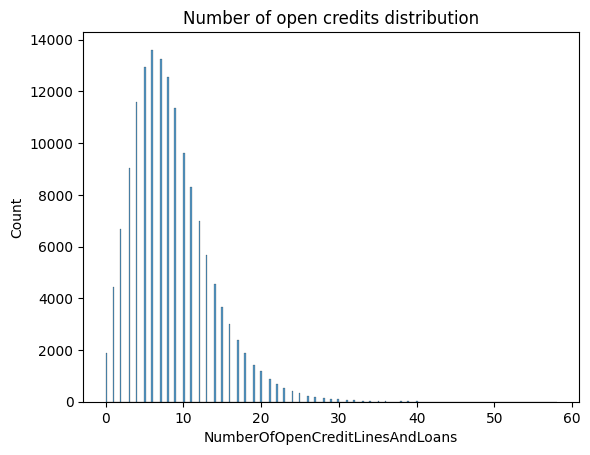

In [ ]:
sns.histplot(df['NumberOfOpenCreditLinesAndLoans'])
plt.title('Number of open credits distribution')
plt.show()

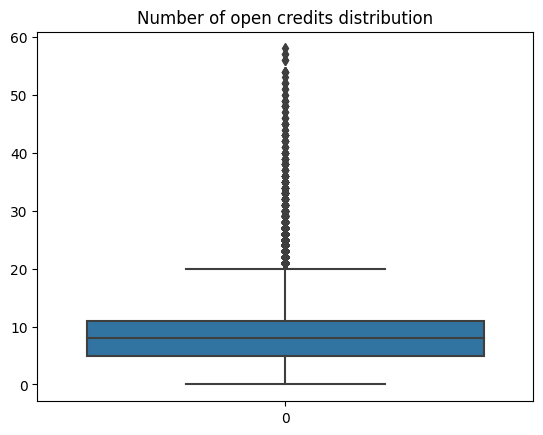

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [ ]:
sns.boxplot(df['NumberOfOpenCreditLinesAndLoans'])
plt.title('Number of open credits distribution')
plt.show()

df['NumberOfOpenCreditLinesAndLoans'].describe()

Похожую ситуацию можно наблюдать и с распределением количества иждивенцев (`NumberOfDependents`).

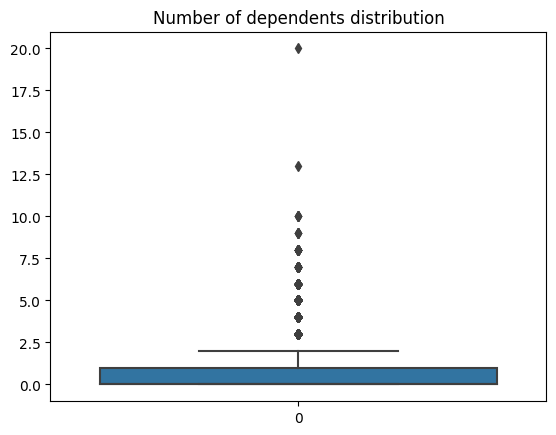

count    150000.000000
mean          0.763573
std           1.101086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [ ]:
sns.boxplot(df['NumberOfDependents'])
plt.title('Number of dependents distribution')
plt.show()

df['NumberOfDependents'].describe()

Возраст заемщиков (`age`) распределен нормально.

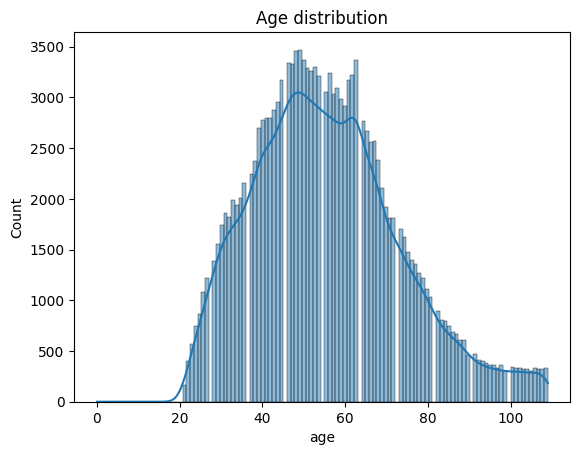

In [ ]:
sns.histplot(df['age'], kde=True)
plt.title('Age distribution')
plt.show()

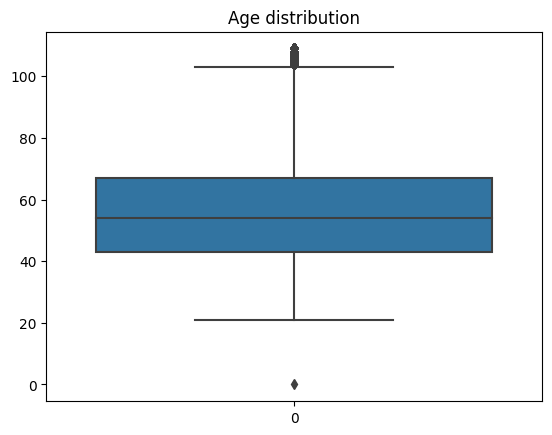

count    150000.000000
mean         55.714227
std          17.882514
min           0.000000
25%          43.000000
50%          54.000000
75%          67.000000
max         109.000000
Name: age, dtype: float64

In [ ]:
sns.boxplot(df['age'])
plt.title('Age distribution')
plt.show()

df['age'].describe()

Ниже можно видеть, как возрастная группа (`GroupAge`) влияет на целевую переменную, означающую возможность просрочки по платежу на 90 и более дней (`SeriousDlqin2yrs`). Можно заметить, что с возрастом всё меньше людей совершают просрочки.

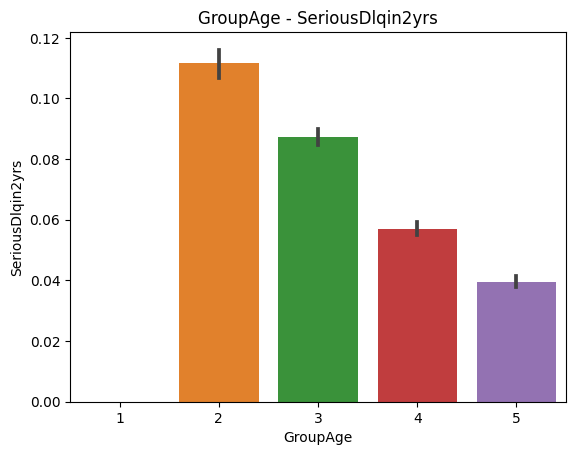

In [ ]:
sns.barplot(data=df, x='GroupAge', y='SeriousDlqin2yrs')
plt.title('GroupAge - SeriousDlqin2yrs')
plt.show()

Такой равномерной зависимости не наблюдается с количеством иждивенцев (`NumberOfDependents`). Больше всего шанс на просрочку у тех, кто содержит 6 человек, а меньше всего у тех, у кого иждивенцев вовсе нет.

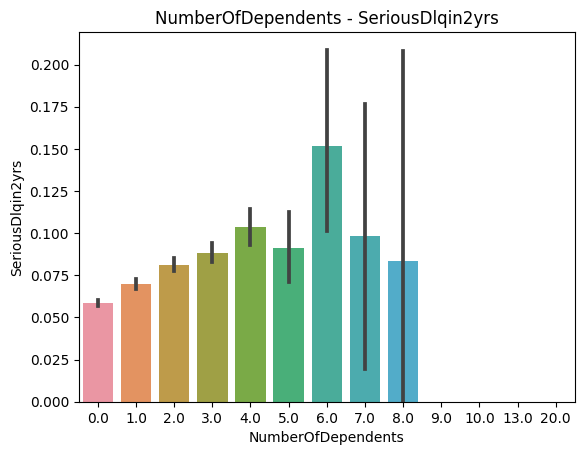

In [ ]:
sns.barplot(data=df, x='NumberOfDependents', y='SeriousDlqin2yrs')
plt.title('NumberOfDependents - SeriousDlqin2yrs')
plt.show()

Закодированное количество кредитов (`RealEstateLoansOrLines`) почти что прямо влияет на риск просрочки, однако отклонения от такой зависимости имеются. Например, заемщики, входящие в 5-ю группу совершили меньше просрочек, чем входящие в 4-ю.

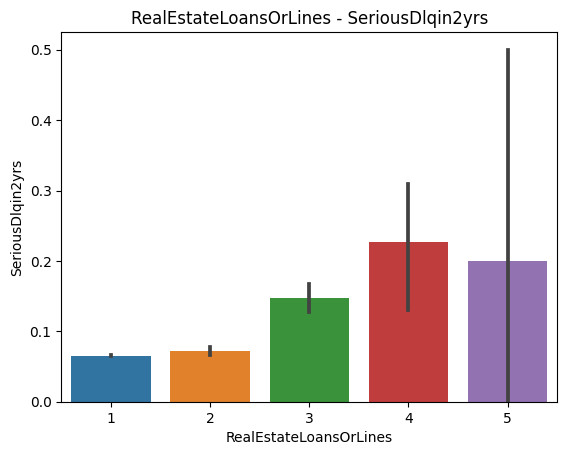

In [ ]:
sns.barplot(data=df, x='RealEstateLoansOrLines', y='SeriousDlqin2yrs')
plt.title('RealEstateLoansOrLines - SeriousDlqin2yrs')
plt.show()

Ниже можно видеть, как различные признаки влияют друг на друга, исходя из корреляции Пирсона.

Наибольшая зависимость наблюдается у признаков отвечающих за просрочки по платежам (`NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTime30-59DaysPastDueNotWorse`), что подтверждает сказанное выше.

Также, относительно всех остальных показателей, значимую слабую зависимость показывают признаки, отвечающие за кредитную группу (`RealEstateLoansOrLines`) и количество кредитов (`NumberOfOpenCreditLinesAndLoans`), что также является логичным.

Целевая же переменная (`SeriousDlqin2yrs`) главным образом зависит от признаков отвечающих за просрочки по платежам, хотя коэффициент корелляции все же достаточно мал.

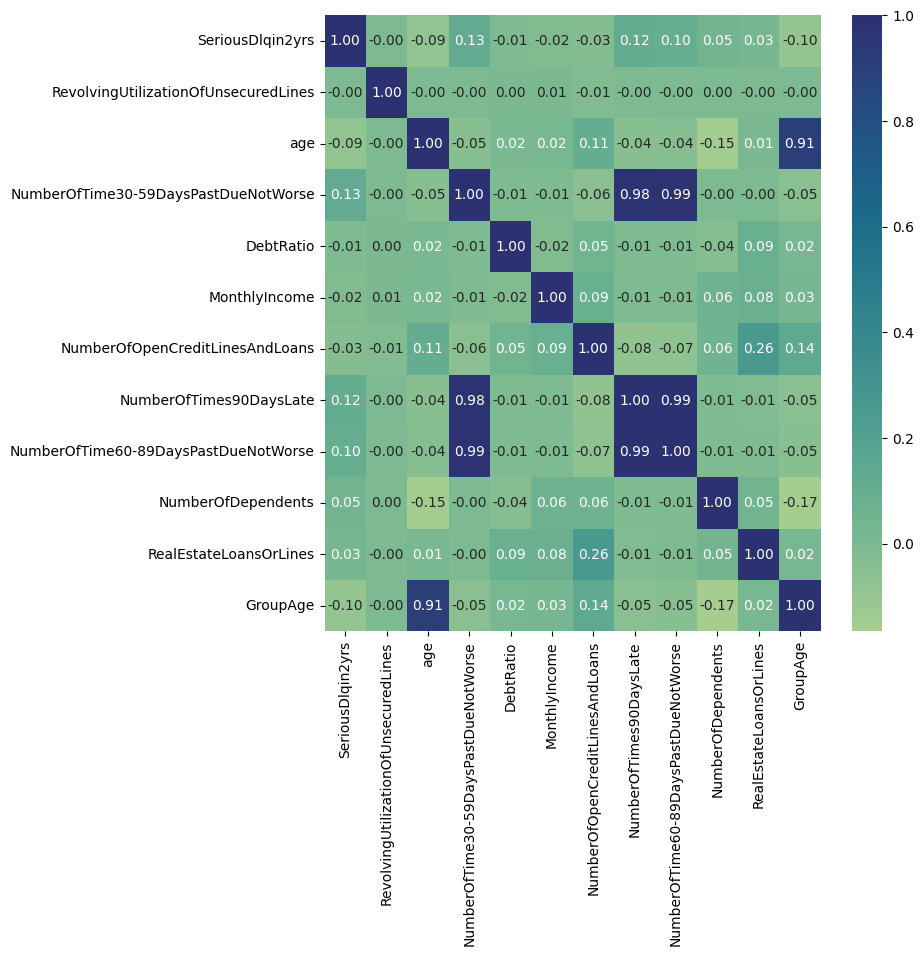

In [ ]:
corr = df[[col for col in df.columns]].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='crest')
plt.show()

In [ ]:
df[[col for col in df.columns]].corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
SeriousDlqin2yrs,1.000000,-0.001802,-0.085043,0.125587,-0.007602,-0.017151,-0.029669,0.117175,0.102261,0.045103,0.027718,-0.096787
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.002146,-0.001314,0.003961,0.006513,-0.011281,-0.001061,-0.001048,0.001646,-0.000876,-0.001645
age,-0.085043,-0.002146,1.000000,-0.046327,0.015706,0.018026,0.110718,-0.044549,-0.041679,-0.153693,0.013760,0.911802
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.046327,1.000000,-0.006542,-0.008370,-0.055312,0.983603,0.987005,-0.001853,-0.004847,-0.050028
DebtRatio,-0.007602,0.003961,0.015706,-0.006542,1.000000,-0.018006,0.049565,-0.008320,-0.007533,-0.036195,0.086480,0.024194
MonthlyIncome,-0.017151,0.006513,0.018026,-0.008370,-0.018006,1.000000,0.086949,-0.010500,-0.009252,0.064794,0.084085,0.027120
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.110718,-0.055312,0.049565,0.086949,1.000000,-0.079984,-0.071077,0.061274,0.262973,0.140525
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.044549,0.983603,-0.008320,-0.010500,-0.079984,1.000000,0.992796,-0.008787,-0.012930,-0.048597
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.041679,0.987005,-0.007533,-0.009252,-0.071077,0.992796,1.000000,-0.009477,-0.010986,-0.045230
NumberOfDependents,0.045103,0.001646,-0.153693,-0.001853,-0.036195,0.064794,0.061274,-0.008787,-0.009477,1.000000,0.046646,-0.165870


In [ ]:
df[[col for col in df.columns]].corr()['SeriousDlqin2yrs']

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines   -0.001802
age                                    -0.085043
NumberOfTime30-59DaysPastDueNotWorse    0.125587
DebtRatio                              -0.007602
MonthlyIncome                          -0.017151
NumberOfOpenCreditLinesAndLoans        -0.029669
NumberOfTimes90DaysLate                 0.117175
NumberOfTime60-89DaysPastDueNotWorse    0.102261
NumberOfDependents                      0.045103
RealEstateLoansOrLines                  0.027718
GroupAge                               -0.096787
Name: SeriousDlqin2yrs, dtype: float64

### 🎓 Обучение модели

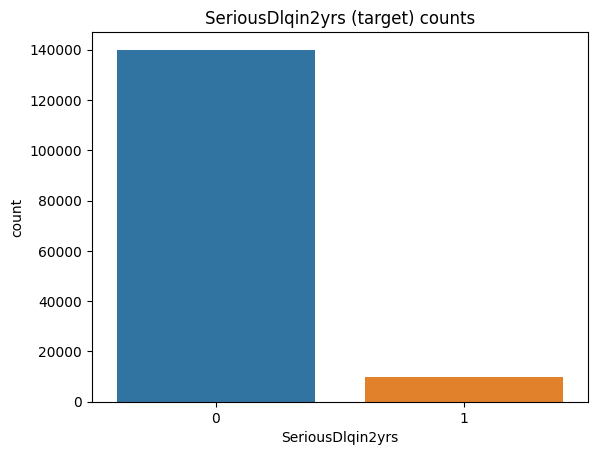

In [ ]:
sns.countplot(x='SeriousDlqin2yrs',data=df)
plt.title('SeriousDlqin2yrs (target) counts')
plt.show()

In [ ]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

Количество `SeriousDlqin2yrs` равных `0` в исходном датасете намного больше, чем равных `1`. Создаем новый, урезая количество нулей примерно до количества единиц для качественного обучения.

In [ ]:
df1 = df.drop(df[(df.SeriousDlqin2yrs == 0) & (df.index < 139000)].index)

In [ ]:
df1['SeriousDlqin2yrs'].value_counts()

0    10250
1    10026
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
X = df1.drop(['SeriousDlqin2yrs'], axis=1)
y = df1['SeriousDlqin2yrs']

In [ ]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
2,0.025656,38.0,0,0.475841,3000.0,7,0,0,2.0,1,3
5,0.392248,50.0,0,1.595253,4676.0,14,0,0,1.0,2,4
8,0.695321,38.0,0,0.618575,7859.0,8,0,0,3.0,1,3
12,0.957570,54.0,0,0.371126,5000.0,11,2,1,2.0,1,4
53,0.234539,53.0,0,1513.000000,5400.0,10,0,0,1.0,1,4


In [ ]:
y.head()

2     1
5     1
8     1
12    1
53    1
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((15207, 11), (5069, 11))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
pred[:5]

array([0, 0, 0, 0, 1])

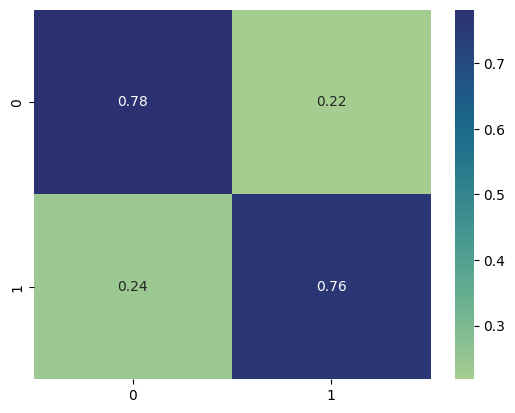

array([[2011,  561],
       [ 592, 1905]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cf = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cf, annot=True, cmap='crest')
plt.show()

confusion_matrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2572
           1       0.77      0.76      0.77      2497

    accuracy                           0.77      5069
   macro avg       0.77      0.77      0.77      5069
weighted avg       0.77      0.77      0.77      5069



### 🔧 Оптимизация гиперпараметров

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': range(50,500),
    'max_depth': range(1,20)
}

search = RandomizedSearchCV(
    model,
    param_distributions=params,
    n_iter=5,
    cv=5
)

search.fit(X_train, y_train)

In [ ]:
model = search.best_estimator_
search.best_params_

{'n_estimators': 400, 'max_depth': 13}

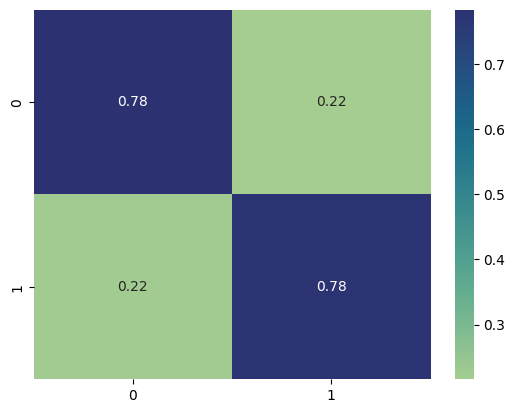

array([[2017,  555],
       [ 556, 1941]])

In [ ]:
pred = model.predict(X_test)

cf = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(cf, annot=True, cmap='crest')
plt.show()

confusion_matrix(y_test, pred)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2572
           1       0.78      0.78      0.78      2497

    accuracy                           0.78      5069
   macro avg       0.78      0.78      0.78      5069
weighted avg       0.78      0.78      0.78      5069



### ❕ Улучшение целевой метрики

Главной целью предсказания было выявление наибольшего возможного числа заемщиков, имеющих риск просрочки платежа на 90 и более дней, т.е. для которых признак `SeriousDlqin2yrs` равен `1.` Поэтому было принято решение улучшить показатель метрики recall путем уменьшения порога вероятности, при которой клиент начинал иметь приск просрочки.

In [ ]:
probs = model.predict_proba(X_test)

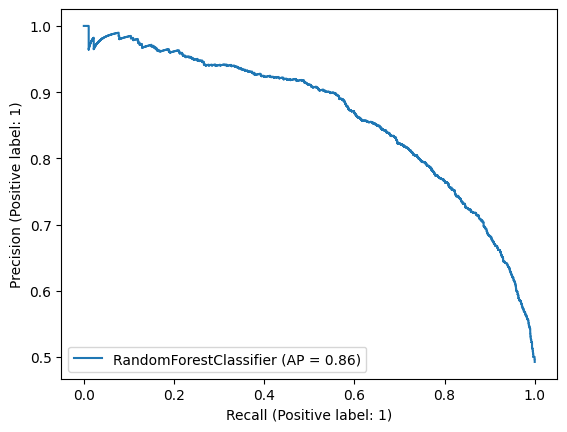

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

prec, rec, threshholds = precision_recall_curve(y_true=y_test, probas_pred=probs[:,1])

In [ ]:
target_prob = threshholds[np.where(rec > 0.85)[0][-1]]
target_prob

0.39074379276042953

In [ ]:
classes = probs[:,1] > target_prob

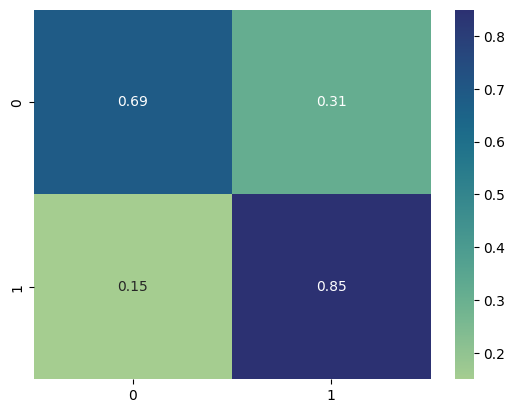

array([[1768,  804],
       [ 375, 2122]])

In [ ]:
cf = confusion_matrix(y_test, classes, normalize='true')
sns.heatmap(cf, annot=True, cmap='crest')
plt.show()

confusion_matrix(y_test, classes)

In [ ]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      2572
           1       0.73      0.85      0.78      2497

    accuracy                           0.77      5069
   macro avg       0.78      0.77      0.77      5069
weighted avg       0.78      0.77      0.77      5069



### 📊 Оценка важности признаков

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X_train)

X_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
0,3.893764e-08,0.534091,0.0,1.706704e-07,0.016185,0.070175,0.000000,0.0,0.000000,0.0,1.000000
1,1.114602e-05,0.750000,0.0,1.211722e-02,0.023018,0.280702,0.000000,0.0,0.000000,0.0,1.000000
2,1.012321e-07,0.988636,0.0,5.461235e-07,0.012148,0.192982,0.000000,0.0,0.111111,0.0,1.000000
3,2.069600e-06,0.284091,0.0,4.301431e-06,0.005328,0.122807,0.000000,0.0,0.111111,0.0,0.333333
4,4.580128e-05,0.170455,0.0,2.038066e-06,0.021667,0.315789,0.081633,0.0,0.111111,0.0,0.333333


In [ ]:
model.fit(X_train, y_train)

pred = model.predict(X_test)

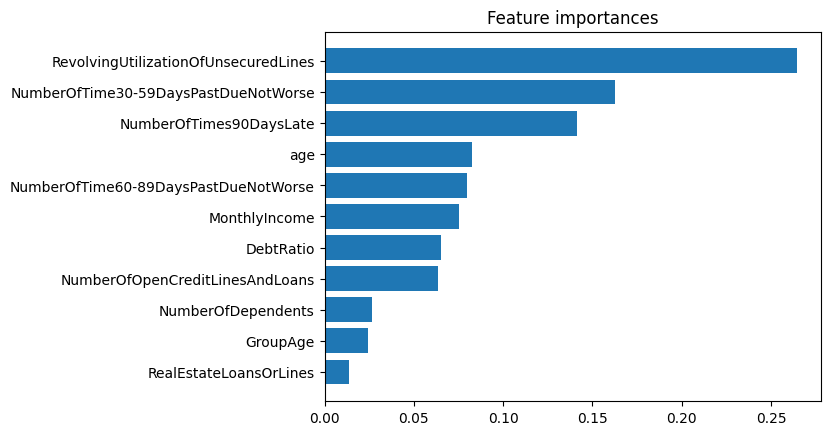

In [ ]:
features = list(zip([col for col in X_train.columns], model.feature_importances_))
features.sort(key=lambda x: x[1])

plt.barh([x[0] for x in features], [x[1] for x in features])
plt.title('Feature importances')
plt.show()

### 💾 Сохранение модели

In [ ]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)